<h1 style="color:blue">Pivot basics</h1>

# The pivot() function is used to reshaped a given DataFrame organized by given index / column values. This function does not support data aggregation,

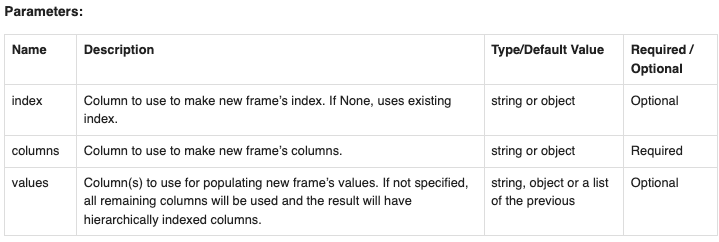

In [12]:
df = pd.DataFrame({'fff': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bbb': ['P', 'Q', 'R', 'P', 'Q', 'R'],
                   'baa': [2, 3, 4, 5, 6, 7],
                   'zzz': ['h', 'i', 'j', 'k', 'l', 'm']})
df

,fff,bbb,baa,zzz
0,one,P,2,h
1,one,Q,3,i
2,one,R,4,j
3,two,P,5,k
4,two,Q,6,l
5,two,R,7,m


In [13]:
df.pivot(index='fff', columns='bbb', values='baa')

bbb,P,Q,R
fff,,,
one,2,3,4
two,5,6,7


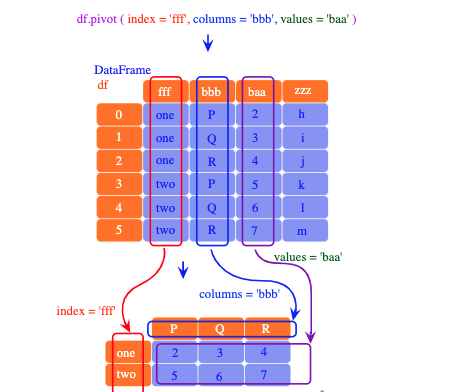

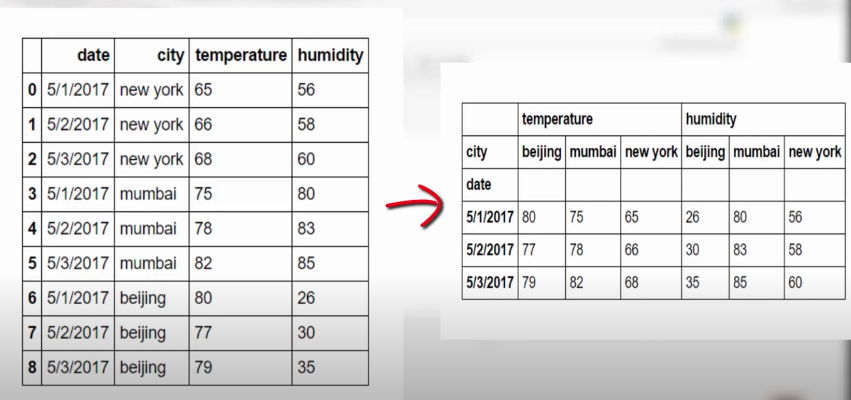

In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv("weather.csv")
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [39]:
df.pivot(index='city',columns='date')

temperature                   humidity                  
date        5/1/2017 5/2/2017 5/3/2017 5/1/2017 5/2/2017 5/3/2017
city                                                             
beijing           80       77       79       26       30       35
mumbai            75       78       82       80       83       85
new york          65       66       68       56       58       60

In [40]:
df.pivot(index='city',columns='date',values="humidity")

date,5/1/2017,5/2/2017,5/3/2017
city,,,
beijing,26,30,35
mumbai,80,83,85
new york,56,58,60


In [41]:
df.pivot(index='date',columns='city')

temperature                 humidity                
city         beijing mumbai new york  beijing mumbai new york
date                                                         
5/1/2017          80     75       65       26     80       56
5/2/2017          77     78       66       30     83       58
5/3/2017          79     82       68       35     85       60

In [42]:
df.pivot(index='humidity',columns='city')

date                     temperature                
city       beijing    mumbai  new york     beijing mumbai new york
humidity                                                          
26        5/1/2017      None      None        80.0    NaN      NaN
30        5/2/2017      None      None        77.0    NaN      NaN
35        5/3/2017      None      None        79.0    NaN      NaN
56            None      None  5/1/2017         NaN    NaN     65.0
58            None      None  5/2/2017         NaN    NaN     66.0
60            None      None  5/3/2017         NaN    NaN     68.0
80            None  5/1/2017      None         NaN   75.0      NaN
83            None  5/2/2017      None         NaN   78.0      NaN
85            None  5/3/2017      None         NaN   82.0      NaN

<h1 style="color:blue">Pivot Table</h1>

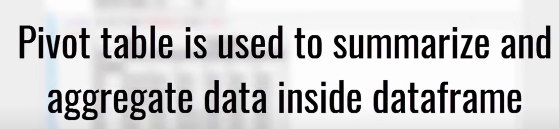

In [15]:
df = pd.read_csv("weather2.csv")
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


In [51]:
df.pivot_table(index="city",columns="date")

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai       81.5     55.5        76.5     81.0
new york     55.0     61.0        63.0     71.0

<h2 style="color:brown">Margins</h2>

In [16]:
df.pivot_table(index="city",columns="date", margins=True,aggfunc=np.sum)

humidity               temperature              
date     5/1/2017 5/2/2017  All    5/1/2017 5/2/2017  All
city                                                     
mumbai        163      111  274         153      162  315
new york      110      122  232         126      142  268
All           273      233  506         279      304  583

<h2 style="color:brown">Grouper</h2>

In [18]:
df = pd.read_csv("weather3.csv")
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,61,54
2,5/3/2017,new york,70,60
3,12/1/2017,new york,30,50
4,12/2/2017,new york,28,52
5,12/3/2017,new york,25,51


In [19]:
df['date'] = pd.to_datetime(df['date'])

In [20]:
df.pivot_table(index=pd.Grouper(freq='M',key='date'),columns='city') #Average temp in the month of may or dec

,humidity,temperature
city,new york,new york
date,,
2017-05-31,56.666667,65.333333
2017-12-31,51.000000,27.666667


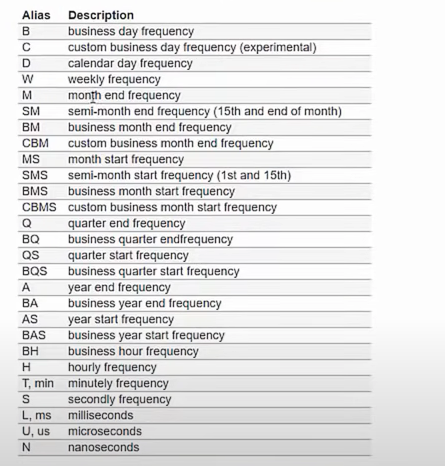